# Backward selection

In [1]:
HOUSING_PATH = "/Users/aleksandr/Desktop/4_лекция_Feature_Selection/Practice_4_housing_(backward_selection)/housing.csv"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.formula.api as sm
from sklearn.metrics import r2_score

%matplotlib inline

In [3]:
housing = pd.read_csv(HOUSING_PATH)
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['population_per_household'] = housing['population']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['rooms_per_household']

In [5]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household  population_per_household  bedrooms_per_room  
0             6.984127                  2.555556          18.470455  
1             6.238137                  2.109842         177.296521  
2             8.288136                  2.802260          22.924335  
3             5.817352                  2.547945          40.396389  
4             6.281853                  2.181467          44.572833

In [6]:
housing.total_bedrooms = housing.total_bedrooms.fillna(value = housing.total_bedrooms.median())

In [7]:
housing.total_bedrooms.value_counts(dropna = False).iloc[:10]

435.0    244
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
348.0     48
394.0     48
328.0     48
309.0     47
Name: total_bedrooms, dtype: int64

In [8]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household  population_per_household  bedrooms_per_room  
0             6.984127                  2.555556          18.470455  
1             6.238137                  2.109842         177.296521  
2             8.288136                  2.802260          22.924335  
3             5.817352                  2.547945          40.396389  
4             6.281853                  2.181467          44.572833

In [9]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
d = {'<1H OCEAN':'<1H_OCEAN', 'INLAND':'INLAND', 'NEAR OCEAN':'NEAR_OCEAN', 'NEAR BAY':'NEAR_BAY', 'ISLAND':'ISLAND'}

In [11]:
housing['ocean_proximity'] = housing['ocean_proximity'].apply(d.get)

In [12]:
housing = pd.get_dummies(housing)

In [13]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   rooms_per_household  population_per_household  bedrooms_per_room  \
0             6.984127                  2.555556          18.470455   
1             6.238137                  2.109842         177.296521   
2             8.288136                  2.802260          22.924335   
3             5.817352                  2.547945          40.396389   
4             6.281853                  2.181467          44.572833   

   ocean_proximity_<1H_OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   

   ocean_proximity_NEAR_BAY  ocean_proximity_NEAR_OCEAN  
0                         1                           0  
1                         1                           0  
2                         1                           0  
3                         1                           0  
4                         1                           0

In [181]:
housing.corr()

longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.044568 -0.036100           -0.361262   
total_bedrooms               0.069120 -0.066484           -0.319026   
population                   0.099773 -0.108785           -0.296244   
households                   0.055310 -0.071035           -0.302916   
median_income               -0.015176 -0.079809           -0.119034   
median_house_value          -0.045967 -0.144160            0.105623   
ocean_proximity_<1H_OCEAN    0.321121 -0.446969            0.045300   
ocean_proximity_INLAND      -0.055575  0.351166           -0.236645   
ocean_proximity_ISLAND       0.009446 -0.016572            0.017020   
ocean_proximity_NEAR_BAY    -0.474489  0.358771            0.255172   
ocean_proximity_NEAR_OCEAN   0.045509 -0.160818            0.021622   

                            total_rooms  total_bedrooms  population  \
longitude                      0.044568        0.069120    0.099773   
latitude                      -0.036100       -0.066484   -0.108785   
housing_median_age            -0.361262       -0.319026   -0.296244   
total_rooms                    1.000000        0.927058    0.857126   
total_bedrooms                 0.927058        1.000000    0.873535   
population                     0.857126        0.873535    1.000000   
households                     0.918484        0.974366    0.907222   
median_income                  0.198050       -0.007617    0.004834   
median_house_value             0.134153        0.049457   -0.024650   
ocean_proximity_<1H_OCEAN     -0.003031        0.017966    0.074613   
ocean_proximity_INLAND         0.025624       -0.006158   -0.020732   
ocean_proximity_ISLAND        -0.007572       -0.004322   -0.010412   
ocean_proximity_NEAR_BAY      -0.023022       -0.019667   -0.060880   
ocean_proximity_NEAR_OCEAN    -0.009175        0.000557   -0.024264   

                            households  median_income  median_house_value  \
longitude                     0.055310      -0.015176           -0.045967   
latitude                     -0.071035      -0.079809           -0.144160   
housing_median_age           -0.302916      -0.119034            0.105623   
total_rooms                   0.918484       0.198050            0.134153   
total_bedrooms                0.974366      -0.007617            0.049457   
population                    0.907222       0.004834           -0.024650   
households                    1.000000       0.013033            0.065843   
median_income                 0.013033       1.000000            0.688075   
median_house_value            0.065843       0.688075            1.000000   
ocean_proximity_<1H_OCEAN     0.042435       0.168876            0.256617   
ocean_proximity_INLAND       -0.039402      -0.237496           -0.484859   
ocean_proximity_ISLAND       -0.009077      -0.009228            0.023416   
ocean_proximity_NEAR_BAY     -0.010093       0.056197            0.160284   
ocean_proximity_NEAR_OCEAN    0.001714       0.027344            0.141862   

                            ocean_proximity_<1H_OCEAN  ocean_proximity_INLAND  \
longitude                                    0.321121               -0.055575   
latitude                                    -0.446969                0.351166   
housing_median_age                           0.045300               -0.236645   
total_rooms                                 -0.003031                0.025624   
total_bedrooms                               0.017966               -0.006158   
population                                   0.074613               -0.020732   
households                                   0.042435               -0.039402   
median_income                                0.168876               -0.237496   
median_hous

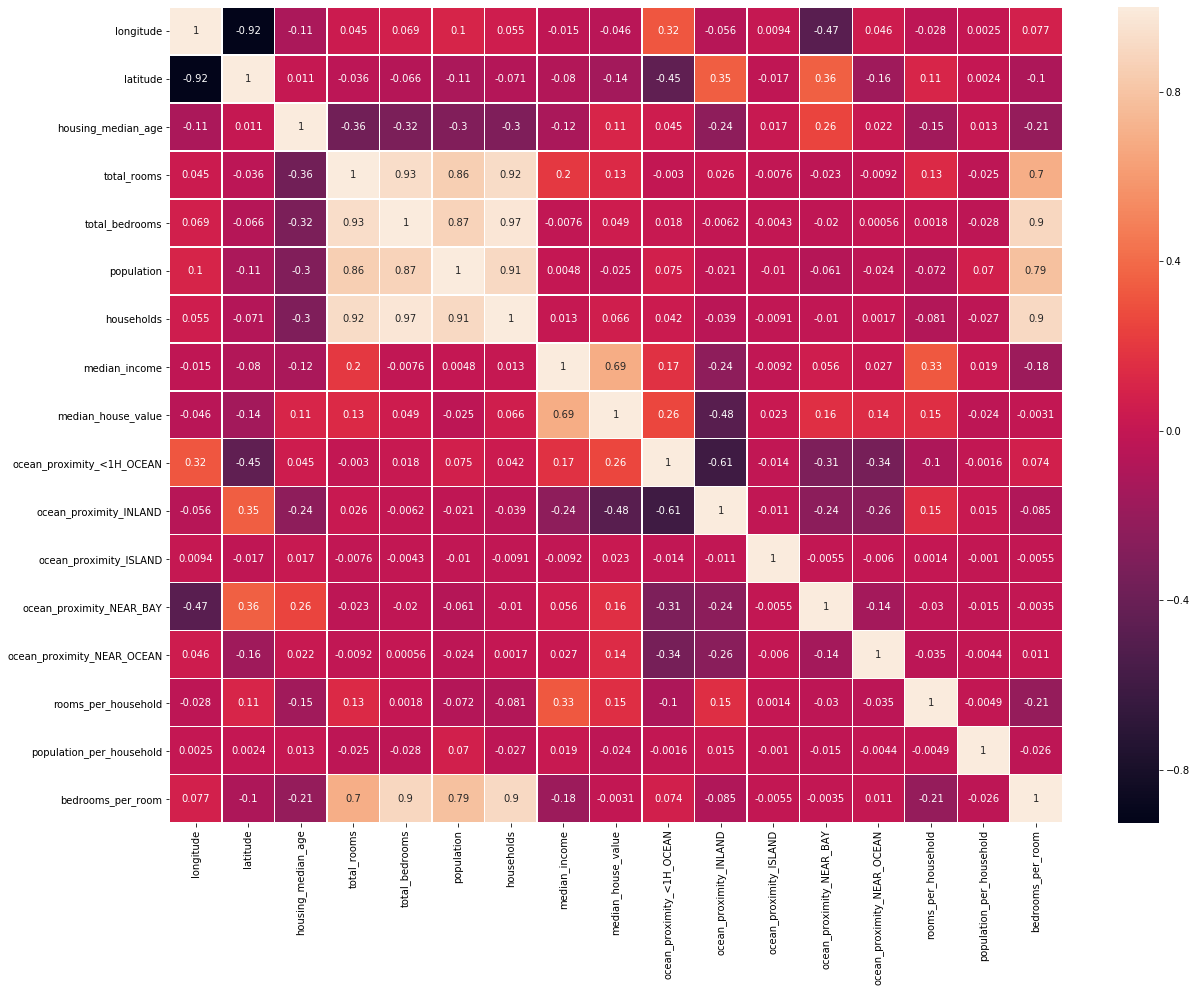

In [198]:
sns.heatmap(housing.corr(), annot = True, linewidths=0.3)
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.show()

In [183]:
y = housing['median_house_value'].copy()

X_housing = housing.copy()
X_housing = X_housing.drop(['median_house_value'], inplace=True, axis=1)

In [184]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26     37.85                52.0       3503.0           752.0   
12       -122.26     37.85                52.0       2491.0           474.0   
13       -122.26     37.84                52.0        696.0           191.0   
14       -122.26     37.85                52.0       2643.0           626.0   
15       -122.26     37.85                50.0       1120.0           283.0   
16       -122.27     37.85                52.0       1966.0           347.0   
17       -122.27     37.85                52.0       1228.0           293.0   
18       -122.26     37.84                50.0       2239.0           455.0   
19       -122.27     37.84                52.0       1503.0           298.0   
20       -122.27     37.85                40.0        751.0           184.0   
21       -122.27     37.85                42.0       1639.0           367.0   
22       -122.27     37.84                52.0       2436.0           541.0   
23       -122.27     37.84                52.0       1688.0           337.0   
24       -122.27     37.84                52.0       2224.0           437.0   
25       -122.28     37.85                41.0        535.0           123.0   
26       -122.28     37.85                49.0       1130.0           244.0   
27       -122.28     37.85                52.0       1898.0           421.0   
28       -122.28     37.84                50.0       2082.0           492.0   
29       -122.28     37.84                52.0        729.0           160.0   
...          ...       ...                 ...          ...             ...   
20610    -121.56     39.10                28.0       2130.0           484.0   
20611    -121.55     39.10                27.0       1783.0           441.0   
20612    -121.56     39.08                26.0       1377.0           289.0   
20613    -121.55     39.09                31.0       1728.0           365.0   
20614    -121.54     39.08                26.0       2276.0           460.0   
20615    -121.54     39.08                23.0       1076.0           216.0   
20616    -121.53     39.08                15.0       1810.0           441.0   
20617    -121.53     39.06                20.0        561.0           109.0   
20618    -121.55     39.06                25.0       1332.0           247.0   
20619    -121.56     39.01                22.0       1891.0           340.0   
20620    -121.48     39.05                40.0        198.0            41.0   
20621    -121.47     39.01                37.0       1244.0           247.0   
20622    -121.44     39.00                20.0        755.0           147.0   
20623    -121.37     39.03                32.0       1158.0           244.0   
20624    -121.41     39.04                16.0       1698.0           300.0   
20625    -121.52     39.12                37.0        102.0            17.0   
20626    -121.43     39.18                36.0       1124.0           184.0   
20627    -121.32     39.13                 5.0        358.0            65.0   
20628    -121.48     39.10                19.0       2043

In [203]:
scaler = preprocessing.MinMaxScaler()

for col in housing.columns.tolist():
    if col not in set(['ocean_proximity_<1H_OCEAN',\
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',\
       'ocean_proximity_NEAR_BAY', 'ocean_proximity_NEAR_OCEAN',\
                      'median_house_value']):
        housing[col] = scaler.fit_transform(housing[[col]])

In [216]:
X_train, X_test = train_test_split(housing, test_size=0.3, random_state=42)

In [225]:
X_train.head(4)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7061    0.630478  0.147715            0.666667     0.060990        0.061608   
14689   0.723108  0.026567            0.372549     0.055471        0.082713   
17323   0.419323  0.217853            0.450980     0.040668        0.043606   
10056   0.333665  0.714134            0.254902     0.020550        0.023277   

       population  households  median_income  median_house_value  \
7061     0.034054    0.066930       0.250431            193800.0   
14689    0.027916    0.081401       0.162977            169700.0   
17323    0.020404    0.046703       0.255355            259800.0   
10056    0.008380    0.022529       0.179963            136100.0   

       ocean_proximity_<1H_OCEAN  ocean_proximity_INLAND  \
7061                           1                       0   
14689                          0                       0   
17323                          0                       0   
10056                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR_BAY  \
7061                        0                         0   
14689                       0                         0   
17323                       0                         0   
10056                       0                         0   

       ocean_proximity_NEAR_OCEAN  rooms_per_household  \
7061                            0             0.035702   
14689                           1             0.025202   
17323                           1             0.033825   
10056                           0             0.035611   

       population_per_household  bedrooms_per_room  
7061                   0.001845           0.045840  
14689                  0.001064           0.082269  
17323                  0.001507           0.033989  
10056                  0.001204           0.017377

## Выбор фич

### Итерация 0

In [266]:
_iteration_cols = housing.columns.drop(['median_house_value', 'longitude', 'latitude', 'ocean_proximity_<1H_OCEAN']) #0.6337688349908629

In [199]:
_iteration_cols = housing.columns.drop(['median_house_value', 'ocean_proximity_<1H_OCEAN']) #0.6454530166046624

In [267]:
def get_formula(_cols):
    return 'median_house_value ~ ' + " + ".join(_cols)

In [268]:
get_formula(_iteration_cols)

'median_house_value ~ housing_median_age + total_rooms + total_bedrooms + population + households + median_income + ocean_proximity_INLAND + ocean_proximity_ISLAND + ocean_proximity_NEAR_BAY + ocean_proximity_NEAR_OCEAN + rooms_per_household + population_per_household + bedrooms_per_room'

In [269]:
lm = sm.ols(get_formula(_iteration_cols), X_train).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 69624.17977697762
R^2: 0.6381622031317544


In [270]:
lm_res = lm.summary()
lm_res.tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Итерация 1

In [271]:
_iteration_cols = _iteration_cols.drop('households')

In [272]:
lm = sm.ols(get_formula(_iteration_cols), housing).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 69511.90235614174
R^2: 0.6371218895093244


In [273]:
lm_res = lm.summary()
lm_res.tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Итерация 2

In [274]:
_iteration_cols = _iteration_cols.drop('population_per_household')

In [275]:
lm = sm.ols(get_formula(_iteration_cols), X_train).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 69627.7945612874
R^2: 0.6381246299912502


In [276]:
lm_res = lm.summary()
lm_res.tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Итерация 3

In [232]:
_iteration_cols = _iteration_cols.drop('ocean_proximity_NEAR_BAY')

In [233]:
lm = sm.ols(get_formula(_iteration_cols), X_train).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 69633.6538382283
R^2: 0.6380637227849076


In [234]:
lm_res = lm.summary()
lm_res.tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

### Итерация 4

In [235]:
_iteration_cols = _iteration_cols.drop('total_bedrooms')

In [236]:
lm = sm.ols(get_formula(_iteration_cols), X_train).fit()
rss = np.sum(lm.resid ** 2)
rmse = np.sqrt(rss / len(lm.resid))
print("RMSE:", rmse)
print("R^2:", lm.rsquared)

RMSE: 69640.61758184894
R^2: 0.6379913279777701


In [237]:
lm_res = lm.summary()
lm_res.tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

## Посмотрим на результат

In [251]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()

X_train1 = X_train1.drop('median_house_value', axis =1)
X_test1 = X_test1.drop('median_house_value', axis =1)

In [244]:
y_train = X_train['median_house_value']
y_test = X_test['median_house_value']

In [260]:
lin_reg = LinearRegression().fit(X_train1, y_train)
y_pred = lin_reg.predict(X_test1)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

68227.03805016198

In [263]:
X_train1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H_OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR_BAY',
       'ocean_proximity_NEAR_OCEAN', 'rooms_per_household',
       'population_per_household', 'bedrooms_per_room'],
      dtype='object')

In [261]:
r2_score(y_test, y_pred)

0.6453496016322583

In [277]:
lin_reg = LinearRegression().fit(X_train1[_iteration_cols], y_train)
y_pred = lin_reg.predict(X_test1[_iteration_cols])
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

69375.06842089139

In [278]:
X_train1[_iteration_cols].columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR_BAY', 'ocean_proximity_NEAR_OCEAN',
       'rooms_per_household', 'bedrooms_per_room'],
      dtype='object')

In [279]:
r2_score(y_test, y_pred)

0.6333140534334132